In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("../input/digit-recognizer"))

['sample_submission.csv', 'train.csv', 'test.csv']


In [2]:
train=pd.read_csv('../input/digit-recognizer/train.csv')
test=pd.read_csv('../input/digit-recognizer/test.csv')
print(train.head())
print(train.shape)
print(test.head())
print(test.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
Y_train=train['label']
X_train=train.drop(['label'],axis=1)

Text(0.5, 1.0, 'Numbers')

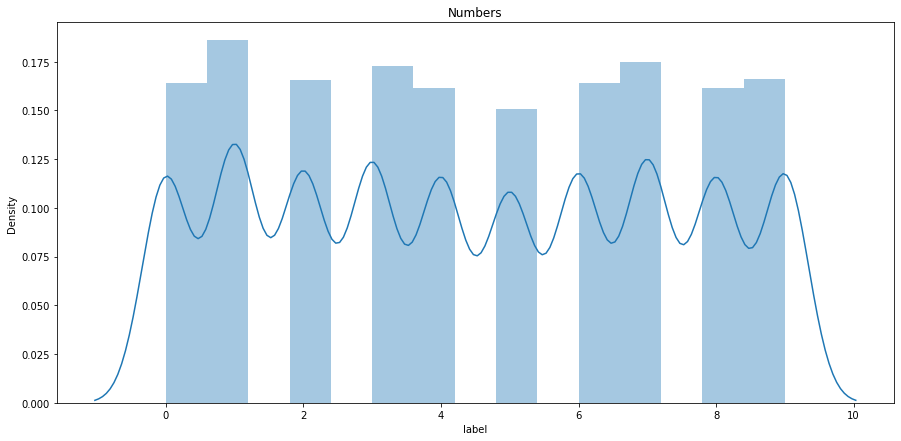

In [4]:
plt.figure(figsize=(15,7))
g = sns.distplot(Y_train,kde=True, bins=15)
plt.title("Numbers")  

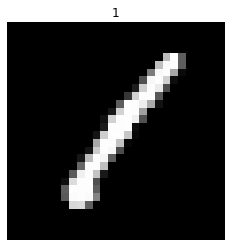

In [5]:
img = np.asarray(X_train.iloc[0])
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

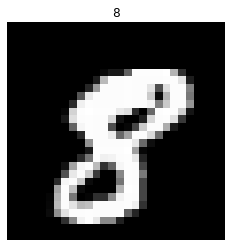

In [6]:
img = np.asarray(X_train.iloc[10])
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[10,0])
plt.axis("off")
plt.show()

In [7]:
X_train=X_train/255
test=test/255

In [8]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [9]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train)

In [10]:
Y_train.shape #10 outputs

(42000, 10)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [12]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [13]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))
optimizer = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

2022-04-01 12:21:11.447283: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [15]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=32),
                              epochs = 20, validation_data = (X_test,Y_test))

2022-04-01 12:21:11.967935: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1182/1182 [==============================] - 20s 16ms/step - loss: 2.2117 - accuracy: 0.2179 - val_loss: 2.0091 - val_accuracy: 0.5286
Epoch 2/20
1182/1182 [==============================] - 19s 16ms/step - loss: 1.8501 - accuracy: 0.4332 - val_loss: 1.3394 - val_accuracy: 0.7167
Epoch 3/20
1182/1182 [==============================] - 19s 16ms/step - loss: 1.4833 - accuracy: 0.5230 - val_loss: 0.9482 - val_accuracy: 0.7643
Epoch 4/20
1182/1182 [==============================] - 19s 16ms/step - loss: 1.3181 - accuracy: 0.5632 - val_loss: 0.7846 - val_accuracy: 0.7905
Epoch 5/20
1182/1182 [==============================] - 19s 16ms/step - loss: 1.2411 - accuracy: 0.5887 - val_loss: 0.6951 - val_accuracy: 0.8129
Epoch 6/20
1182/1182 [==============================] - 19s 16ms/step - loss: 1.1689 - accuracy: 0.6140 - val_loss: 0.6281 - val_accuracy: 0.8345
Epoch 7/20
1182/1182 [==============================] - 19s 16ms/step - loss: 1.1179 - accuracy: 0.6331 - val_loss: 0.5847 -

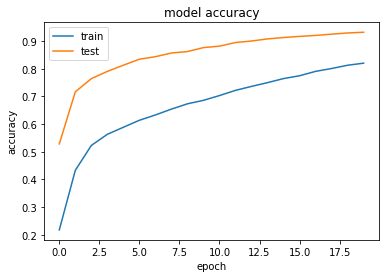

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:

df = pd.DataFrame()
df["ImageId"] = range(1,len(test)+1)
probalilites = model.predict(test)
digits =[0,1,2,3,4,5,6,7,8,9]
labels = [digits[np.argmax(prob)] for prob in probalilites]
df["Label"] =labels
df.set_index("ImageId")
df.to_csv('submission.csv', index=False)